<a href="https://colab.research.google.com/github/Rockuzzer/Capstone_Prject/blob/main/Capstone_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOMAIN: Automotive Surveillance.

CONTEXT:
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of
the car, type, colour, number plates etc.

DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
Data description:

*   Test Images: Consists of real images of cars as per the make and year of the car.
*   Train Images: Consists of real images of cars as per the make and year of the car.
*   Train Annotation: Consists of bounding box region for training images.
*   Test Annotation: Consists of bounding box region for testing images.

Dataset has been attached along with this project. Please use the same for this capstone project.
Original link to the dataset for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder [ for your
reference only ]

Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE
Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import numpy as np
import os
import zipfile
import pandas as pd
from zipfile import ZipFile
import glob
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mp

Step 1: Import the data.

In [5]:
# Step 1: Import the data

# Path to the zip files
annotations = "/content/drive/MyDrive/AIML/Capstone Project/Annotations.zip"
car_images = "/content/drive/MyDrive/AIML/Capstone Project/CarImages.zip"

# Directory to extract the data
extracted_dir = "/content/drive/MyDrive/AIML/Capstone Project/extracted_data"

# Function to extract zip files
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract the annotations
extract_zip(annotations, extracted_dir)

# Extract the car images
extract_zip(car_images, extracted_dir)

# List the contents of the extracted directory
extracted_contents = os.listdir(extracted_dir)
print("Contents of the extracted directory:", extracted_contents)

Contents of the extracted directory: ['Annotations', 'CarImages', '__MACOSX']


Step 2: Map training and testing images to its classes.

In [23]:
import tensorflow as tf

# Directory paths
train_dir = "/content/drive/MyDrive/AIML/Capstone Project/extracted_data/CarImages/Train Images"
test_dir = "/content/drive/MyDrive/AIML/Capstone Project/extracted_data/CarImages/Test Images"

# Load training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,  # Use the same directory for both training and validation
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
)

# Load testing dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
)

Found 8144 files belonging to 196 classes.
Using 6516 files for training.
Found 8144 files belonging to 196 classes.
Using 1628 files for validation.
Found 8041 files belonging to 196 classes.


In [24]:
# Get the class names from the training dataset
class_names = train_dataset.class_names

# Map training images to their classes
train_image_to_class = {i: class_names[label] for i, (_, label) in enumerate(train_dataset.unbatch().take(6516))}

# Get the class names from the testing dataset
test_class_names = test_dataset.class_names

# Map testing images to their classes
test_image_to_class = {i: test_class_names[label] for i, (_, label) in enumerate(test_dataset.unbatch().take(8041))}

# Print a few examples
print("Training Image to Class Mapping:")
for i in range(5):
    print(f"Image {i}: Class - {train_image_to_class[i]}")

print("\nTesting Image to Class Mapping:")
for i in range(5):
    print(f"Image {i}: Class - {test_image_to_class[i]}")

Training Image to Class Mapping:
Image 0: Class - Chrysler PT Cruiser Convertible 2008
Image 1: Class - Dodge Caliber Wagon 2007
Image 2: Class - Chevrolet Cobalt SS 2010
Image 3: Class - Hyundai Sonata Sedan 2012
Image 4: Class - Bugatti Veyron 16.4 Coupe 2009

Testing Image to Class Mapping:
Image 0: Class - AM General Hummer SUV 2000
Image 1: Class - AM General Hummer SUV 2000
Image 2: Class - AM General Hummer SUV 2000
Image 3: Class - AM General Hummer SUV 2000
Image 4: Class - AM General Hummer SUV 2000


In [25]:
# prnt some information about the testing dataset
print("Testing Dataset Information:")
print("Number of classes in the testing dataset:", len(set(test_image_to_class.values())))
print("Total number of testing images:", len(test_image_to_class))

Testing Dataset Information:
Number of classes in the testing dataset: 196
Total number of testing images: 8041


In [26]:
# Print the class information for all testing images
print("All Testing Image to Class Mapping:")
for image_id, class_info in test_image_to_class.items():
    print(f"Image {image_id}: Class - {class_info}")

Streaming output truncated to the last 5000 lines.
Image 3041: Class - Chrysler 300 SRT-8 2010
Image 3042: Class - Chrysler 300 SRT-8 2010
Image 3043: Class - Chrysler 300 SRT-8 2010
Image 3044: Class - Chrysler 300 SRT-8 2010
Image 3045: Class - Chrysler 300 SRT-8 2010
Image 3046: Class - Chrysler 300 SRT-8 2010
Image 3047: Class - Chrysler 300 SRT-8 2010
Image 3048: Class - Chrysler 300 SRT-8 2010
Image 3049: Class - Chrysler 300 SRT-8 2010
Image 3050: Class - Chrysler 300 SRT-8 2010
Image 3051: Class - Chrysler 300 SRT-8 2010
Image 3052: Class - Chrysler 300 SRT-8 2010
Image 3053: Class - Chrysler 300 SRT-8 2010
Image 3054: Class - Chrysler 300 SRT-8 2010
Image 3055: Class - Chrysler 300 SRT-8 2010
Image 3056: Class - Chrysler 300 SRT-8 2010
Image 3057: Class - Chrysler 300 SRT-8 2010
Image 3058: Class - Chrysler 300 SRT-8 2010
Image 3059: Class - Chrysler 300 SRT-8 2010
Image 3060: Class - Chrysler 300 SRT-8 2010
Image 3061: Class - Chrysler 300 SRT-8 2010
Image 3062: Class - Chrys

Step 3: Map training and testing images to its annotations.

In [27]:
# Function to map images to annotations
def map_images_to_annotations(dataset_df, image_id_column):
    image_to_annotation = {}
    for _, row in dataset_df.iterrows():
        image_id = row[image_id_column]
        image_to_annotation[image_id] = {'Bounding Box coordinates': row['Bounding Box coordinates'], 'Class': row['Image class']}
    return image_to_annotation

# Specify the actual column names used in your annotations CSV files
train_image_id_column = 'Image Name'
test_image_id_column = 'Image Name'

# Map training images to their annotations
train_image_to_annotation = map_images_to_annotations(train_annotations_df, train_image_id_column)

# Map testing images to their annotations
test_image_to_annotation = map_images_to_annotations(test_annotations_df, test_image_id_column)

# Print a few examples
print("Training Image to Annotation Mapping:")
for i, (image_id, annotation_info) in enumerate(train_image_to_annotation.items()):
    print(f"Image {image_id}: {annotation_info}")
    if i >= 4:
        break  # Print only the first 5 items

print("\nTesting Image to Annotation Mapping:")
for i, (image_id, annotation_info) in enumerate(test_image_to_annotation.items()):
    print(f"Image {image_id}: {annotation_info}")
    if i >= 4:
        break  # Print only the first 5 items

Training Image to Annotation Mapping:
Image 00001.jpg: {'Bounding Box coordinates': 39, 'Class': 14}
Image 00002.jpg: {'Bounding Box coordinates': 36, 'Class': 3}
Image 00003.jpg: {'Bounding Box coordinates': 85, 'Class': 91}
Image 00004.jpg: {'Bounding Box coordinates': 621, 'Class': 134}
Image 00005.jpg: {'Bounding Box coordinates': 14, 'Class': 106}

Testing Image to Annotation Mapping:
Image 00001.jpg: {'Bounding Box coordinates': 30, 'Class': 181}
Image 00002.jpg: {'Bounding Box coordinates': 100, 'Class': 103}
Image 00003.jpg: {'Bounding Box coordinates': 51, 'Class': 145}
Image 00004.jpg: {'Bounding Box coordinates': 67, 'Class': 187}
Image 00005.jpg: {'Bounding Box coordinates': 140, 'Class': 185}


In [28]:
# Print detailed information about annotations for training images
print("Training Annotations Information:")
for image_id, annotation_info in train_image_to_annotation.items():
    print(f"Image {image_id}:")
    print(f"  Bounding Box coordinates: {annotation_info['Bounding Box coordinates']}")
    print(f"  Class: {annotation_info['Class']}")
    print("\n")

# Print detailed information about annotations for testing images
print("Testing Annotations Information:")
for image_id, annotation_info in test_image_to_annotation.items():
    print(f"Image {image_id}:")
    print(f"  Bounding Box coordinates: {annotation_info['Bounding Box coordinates']}")
    print(f"  Class: {annotation_info['Class']}")
    print("\n")

Streaming output truncated to the last 5000 lines.
Image 07042.jpg:
  Bounding Box coordinates: 55
  Class: 162


Image 07043.jpg:
  Bounding Box coordinates: 19
  Class: 16


Image 07044.jpg:
  Bounding Box coordinates: 25
  Class: 116


Image 07045.jpg:
  Bounding Box coordinates: 23
  Class: 75


Image 07046.jpg:
  Bounding Box coordinates: 24
  Class: 77


Image 07047.jpg:
  Bounding Box coordinates: 20
  Class: 55


Image 07048.jpg:
  Bounding Box coordinates: 31
  Class: 5


Image 07049.jpg:
  Bounding Box coordinates: 43
  Class: 40


Image 07050.jpg:
  Bounding Box coordinates: 19
  Class: 69


Image 07051.jpg:
  Bounding Box coordinates: 10
  Class: 3


Image 07052.jpg:
  Bounding Box coordinates: 5
  Class: 32


Image 07053.jpg:
  Bounding Box coordinates: 43
  Class: 125


Image 07054.jpg:
  Bounding Box coordinates: 73
  Class: 55


Image 07055.jpg:
  Bounding Box coordinates: 1
  Class: 161


Image 07056.jpg:
  Bounding Box coordinates: 27
  Class: 79


Image 07057.jpg:
  

‣ Step 4: Display images with bounding box.

In [29]:
# Print contents of the training directory
print("Contents of the training directory:", os.listdir(train_dir))

Contents of the training directory: ['Dodge Dakota Crew Cab 2010', 'GMC Canyon Extended Cab 2012', 'Hyundai Santa Fe SUV 2012', 'Dodge Durango SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012', 'Ford Mustang Convertible 2007', 'Buick Rainier SUV 2007', 'Jeep Compass SUV 2012', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Ford Edge SUV 2012', 'Dodge Ram Pickup 3500 Quad Cab 2009', 'Bentley Continental Supersports Conv. Convertible 2012', 'Land Rover Range Rover SUV 2012', 'Hyundai Tucson SUV 2012', 'Honda Odyssey Minivan 2007', 'Audi 100 Wagon 1994', 'Dodge Challenger SRT8 2011', 'Mercedes-Benz Sprinter Van 2012', 'Bentley Continental GT Coupe 2012', 'Rolls-Royce Ghost Sedan 2012', 'Lamborghini Gallardo LP 570-4 Superleggera 2012', '.DS_Store', 'Dodge Charger SRT-8 2009', 'Volkswagen Beetle Hatchback 2012', 'Audi TT RS Coupe 2012', 'Acura TSX Sedan 2012', 'Jaguar XK XKR 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Honda Accord Sedan 2012', 'BMW X5 SUV 2007', 'Ford F-150 

In [30]:
# Print the column names in the annotation DataFrame
print("Annotation DataFrame columns:", train_annotations_df.columns)

Annotation DataFrame columns: Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

# Function to display image with bounding boxes
def display_image_with_boxes(image_path, annotations_df):
    # Load the image
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)

    # Display the image
    plt.imshow(img_array.astype("uint8"))

    # Plot bounding boxes
    for index, row in annotations_df.iterrows():
        left, top, width, height = row["Unnamed: 2"], row["Unnamed: 3"], row["Unnamed: 4"], row["Bounding Box coordinates"]
        xmin, ymin, xmax, ymax = left, top, left + width, top + height
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor="r", facecolor="none")
        plt.gca().add_patch(rect)

    plt.show()

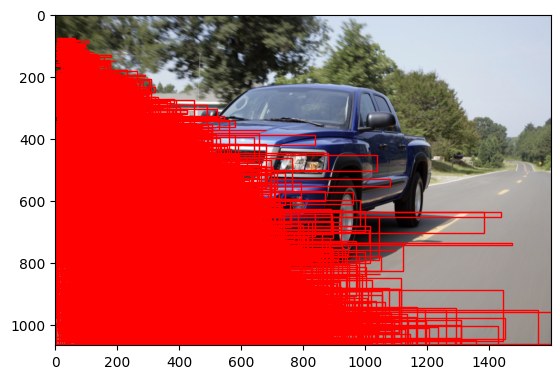

In [32]:
# Example usage for training image with bounding boxes
train_example_image_path = os.path.join(train_dir, "Dodge Dakota Crew Cab 2010", "00202.jpg")  # Replace with an actual image path
display_image_with_boxes(train_example_image_path, train_annotations_df)